In [16]:
import json
import glob
import re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [18]:
os.chdir("..")
print("CWD is now:", os.getcwd()) 

CWD is now: /Users/nabilasiregar/code/emergent-communication


In [ ]:
def plot_accuracy_over_epochs(run_dirs):
    """
    Plots mean train and validation accuracy over epochs with std deviation shaded,
    across multiple runs reading from epoch_summary.jsonl files.

    Parameters:
    - run_dirs (dict): Mapping from seed IDs to directories containing 'epoch_summary.jsonl'
    """
    train_acc = {}
    val_acc = {}

    for seed, run_dir in run_dirs.items():
        jsonl_path = os.path.join(run_dir, 'epoch_summary.jsonl')
        with open(jsonl_path, 'r', encoding='utf-8') as f:
            records = [json.loads(line) for line in f]
        df = pd.DataFrame(records).sort_values(['mode', 'epoch'])
        
        # Separate out train and validation
        train_df = df[df['mode'] == 'train'].set_index('epoch')
        val_df = df[df['mode'] == 'validation'].set_index('epoch')
        
        train_acc[seed] = train_df['acc']
        val_acc[seed] = val_df['acc']

    # Combine into DataFrames: rows=epochs, cols=seeds
    train_combined = pd.DataFrame(train_acc)
    val_combined = pd.DataFrame(val_acc)

    # Compute mean and standard deviation
    train_mean = train_combined.mean(axis=1)
    train_std = train_combined.std(axis=1)
    val_mean = val_combined.mean(axis=1)
    val_std = val_combined.std(axis=1)

    plt.figure()
    plt.plot(train_mean.index, train_mean, label='Train Mean Accuracy')
    plt.fill_between(train_mean.index, train_mean - train_std, train_mean + train_std, alpha=0.3)
    plt.plot(val_mean.index, val_mean, label='Test Mean Accuracy')
    plt.fill_between(val_mean.index, val_mean - val_std, val_mean + val_std, alpha=0.3)
    
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Train vs. Test Accuracy')
    plt.legend()
    plt.show()


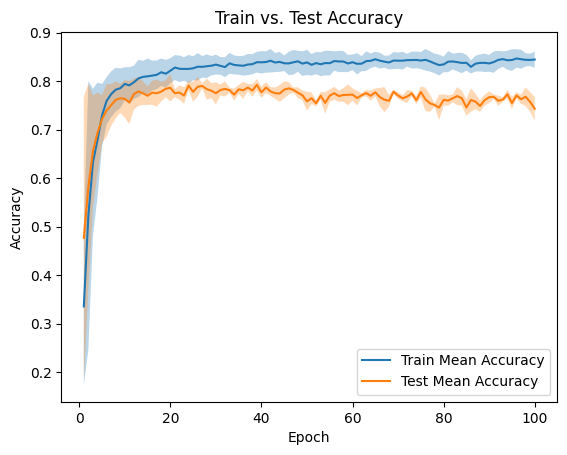

In [ ]:
# BEE, 100 epochs
run_dirs = {
    42: 'logs/baseline_bee_gs_seed42_20250521_235929',
    2025: 'logs/baseline_bee_gs_seed2025_20250522_000952',
    123: 'logs/baseline_bee_gs_seed123_20250522_001727'
}

plot_accuracy_over_epochs(run_dirs)

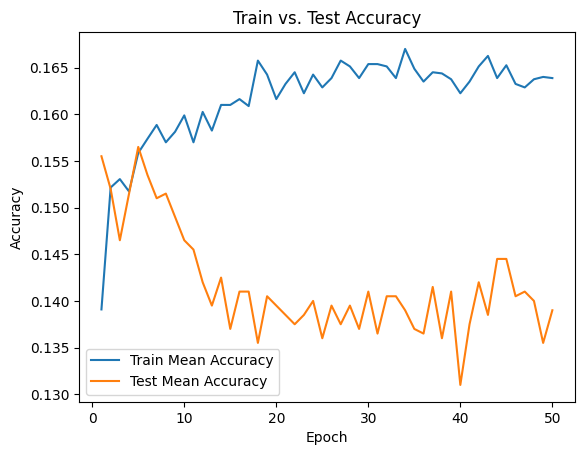

In [20]:
run_dirs = {
    42: 'logs/baseline_human_gs_seed42_20250522_003034',
}

plot_accuracy_over_epochs(run_dirs)